패키지

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 통계함수가 들어있는 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

데이터호출

In [2]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
x_train, x_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, test_size=0.2, random_state=12345
)
y_train

array([0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0,
       2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1,
       0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
       1, 2, 2, 0, 2, 0, 2, 2, 2, 0])

In [15]:
dt = DecisionTreeClassifier(random_state=12345, max_depth=2)

In [16]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=12345)

In [17]:
y_pred = dt.predict(x_test)
print(y_pred)
print(y_test)

[1 0 1 0 0 0 1 0 1 1 0 2 1 2 2 2 0 2 1 1 1 1 0 1 0 2 0 1 0 2]
[1 0 1 0 0 0 1 0 1 2 0 2 1 1 2 2 0 2 1 1 1 1 0 1 0 2 0 1 0 2]


In [18]:
metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

In [19]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[11,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  6]], dtype=int64)

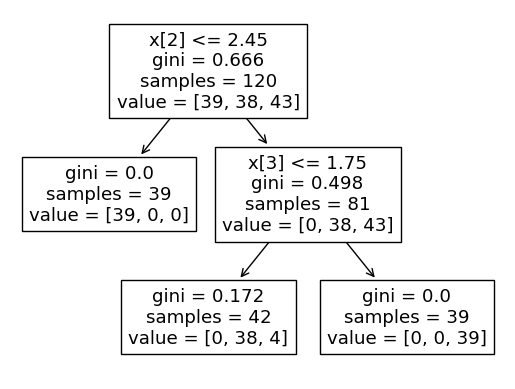

In [20]:
plot_tree(dt)
plt.show()

In [24]:
for name, value in zip(iris_data.feature_names, dt.feature_importances_):
    print(f"{name}: {value:.3f}")

sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.544
petal width (cm): 0.456


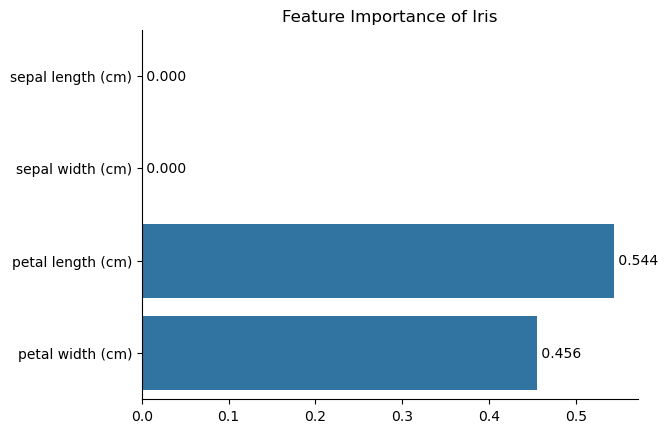

In [30]:
ax = sns.barplot(x=dt.feature_importances_, y=iris_data.feature_names)
ax.bar_label(ax.containers[0], fmt=" %.3f")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.title("Feature Importance of Iris")
plt.show()